# 다중 회귀 - 보스톤 주택 가격

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
from sklearn.datasets import load_boston
boston = load_boston()

C:\Users\ICT01_10\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Califor

In [26]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- 산점도와 선형회귀선:seaborn.regplot()

In [27]:
features = df.columns[1:-1]
print(features)

Index(['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


<AxesSubplot:xlabel='CRIM', ylabel='PRICE'>

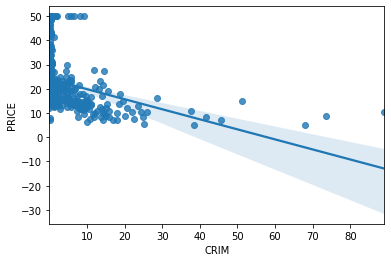

In [28]:
sns.regplot(x='CRIM', y='PRICE', data=df)

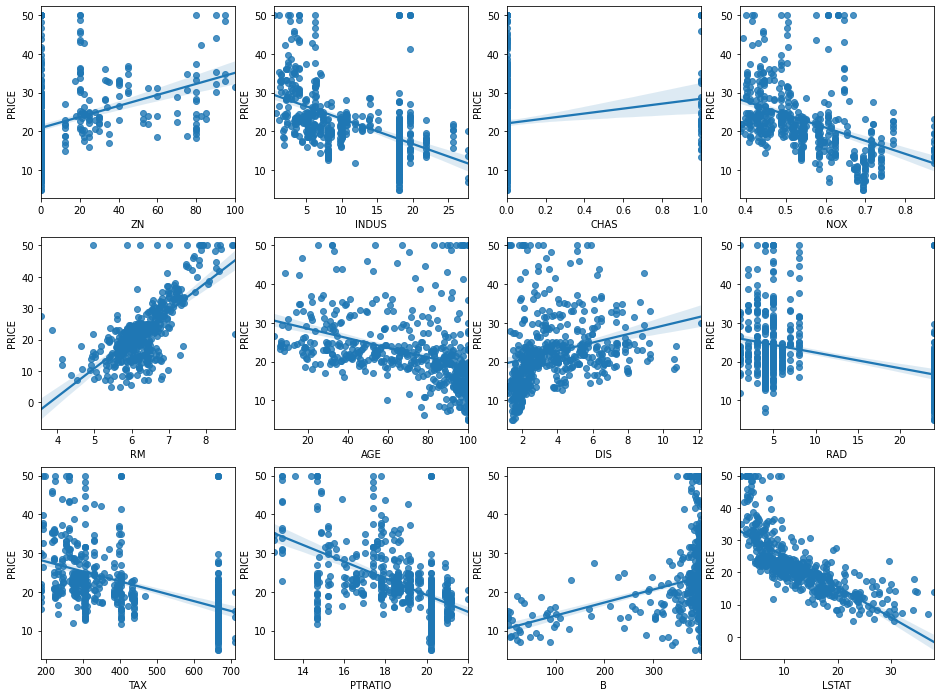

In [29]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(16,12))
for i, feature in enumerate(features):
    row, col = i // 4, i % 4
    sns.regplot(x=feature, y='PRICE', data=df, ax=axs[row][col])

- 어떤 feature가 가격과 상관관계가 높을까?

In [30]:
from sklearn.linear_model import LinearRegression

In [33]:
y = boston.target
X = df['CRIM'].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.15078046904975717

In [35]:
df.columns[:-1]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [39]:
for i in df.columns[:-1]:
    y = boston.target
    X = df[i].values.reshape(-1,1)
    lr = LinearRegression()
    lr.fit(X, y)
    print(i, lr.score(X, y))


CRIM 0.15078046904975717
ZN 0.12992084489428946
INDUS 0.2339900304444752
CHAS 0.03071612970877491
NOX 0.182603042501699
RM 0.48352545599133423
AGE 0.14209474407780442
DIS 0.062464372121782574
RAD 0.14563857991232532
TAX 0.2195259210442193
PTRATIO 0.257847318009223
B 0.11119611824636277
LSTAT 0.5441462975864799


In [38]:
y = boston.target
for feature in boston.feature_names: # 이름 붙일 때 range 같은 숫자 반복이면 i로 받고 다른 문자열 등의 복수형이면 해당 복수형의 단수로 받는 것이 통용되는 상식?
    X = df[feature].values.reshape(-1,1)
    lr = LinearRegression()
    lr.fit(X, y)
    r2 = lr.score(X, y)
    print(f'{feature}:\t{r2:.4f}')


CRIM:	0.1508
ZN:	0.1299
INDUS:	0.2340
CHAS:	0.0307
NOX:	0.1826
RM:	0.4835
AGE:	0.1421
DIS:	0.0625
RAD:	0.1456
TAX:	0.2195
PTRATIO:	0.2578
B:	0.1112
LSTAT:	0.5441


- 다중 선형회귀

In [40]:
X = boston.data
y = boston.target
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [43]:
lr.score(X,y) # 다중선형회귀에서는 score가 큰 의미가 없음

0.7406426641094095

In [44]:
# Weight 기울기
lr.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [45]:
# bias 절편
lr.intercept_

36.459488385089855

- 회귀식
<pre>
PRICE = -0.108 * CRIM + 0.046 * ZN + 0.021 * INDUS + 2.69 * CHAS - 0.178 * NOX + 3.81 * RM + 0.00069 * AGE - 1.48 * DIS + 0.306 * RAD - 0.012 * TAX - 0.953 * PTRATIO + 0.00931 * B - 0.525 * LSTAT + 36.46 
</pre>

- 테스트 데이터

In [46]:
boston.data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [48]:
# 기울기와 절편을 이용한 예측값
np.dot(lr.coef_, boston.data[0]) + lr.intercept_

30.003843377016814

In [49]:
# 실제값
boston.target[0]

24.0

In [53]:
# 5개 데이터에 대한 예측값 및 실제값
for i in range(5):
    pred = np.dot(lr.coef_, boston.data[i]) + lr.intercept_
    print(f'예측값: {pred:.2f}, 실제값: {boston.target[i]}')

예측값: 30.00, 실제값: 24.0
예측값: 25.03, 실제값: 21.6
예측값: 30.57, 실제값: 34.7
예측값: 28.61, 실제값: 33.4
예측값: 27.94, 실제값: 36.2


In [54]:
# 데이터가 여러 개일 때
lr.predict(boston.data[:5])

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

In [56]:
# 데이터가 한 개일 때
lr.predict(boston.data[0:1]), lr.predict(boston.data[0].reshape(1,-1)) # [0]만 쓰면 차원이 맞지 않아 에러

(array([30.00384338]), array([30.00384338]))